# Sales Predictions & Insights
## Analyzing Outlets and Outlets Types by Item Sales

Zach Dawson

When managing a business, it is often hard to keep track of sales when handling multiple stores. It can be difficult to predict how certain types of stores produce the most sales. This is the problem that is trying to be solved in this notebook.

### Data Source:
Big Mart Sales Predicition https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/

### Data Dictionary

|Variable Name	| Description |
|---------------|-------------|
| Item_Identifier |	Unique product ID |
|Item_Weight |	Weight of product |
|Item_Fat_Content |	Whether the product is low fat or regular |
|Item_Visibility |	The percentage of total display area of all products in a store allocated to the particular product |
|Item_Type |	The category to which the product belongs |
|Item_MRP |	Maximum Retail Price (list price) of the product |
|Outlet_Identifier |	Unique store ID |
|Outlet_Establishment_Year | The year in which store was established |
|Outlet_Size |	The size of the store in terms of ground area covered |
|Outlet_Location_Type |	The type of area in which the store is located |
|Outlet_Type |	Whether the outlet is a grocery store or some sort of supermarket |
|Item_Outlet_Sales |	Sales of the product in the particular store. This is the target variable to be predicted.  |

1. Import all modules needed for this analysis.

### Imports

In [74]:
# For data frames and arrays
import pandas as pd
import numpy as np
# For creating visualization from data set
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
# For Machine Learning
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
# To visualize the model processing tree
from sklearn import set_config
set_config(display='diagram')

### Loading Data

In [75]:
file_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRkIwH94EktrYdv19S1dFxJGuqxCb1kaXAwEKrePJOvMIlsq-bsf7OQiS4FKSgxwhb5Kb00BUFV1d14/pub?gid=834996468&single=true&output=csv"
df = pd.read_csv(file_url)

### Getting DataFrame information

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [77]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Data Cleaning

In [78]:
# Checking for rows/columns
df.shape

(8523, 12)

- The dataset has 8,523 rows and 12 columns.

In [79]:
# Checking for data type of each column
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [80]:
# checking for duplicates
df.duplicated().sum()

0

In [81]:
# Checking for NaN values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- Before dropping columns or imputing missing values, I want to check the correlations between the features and the target variable.

<AxesSubplot:>

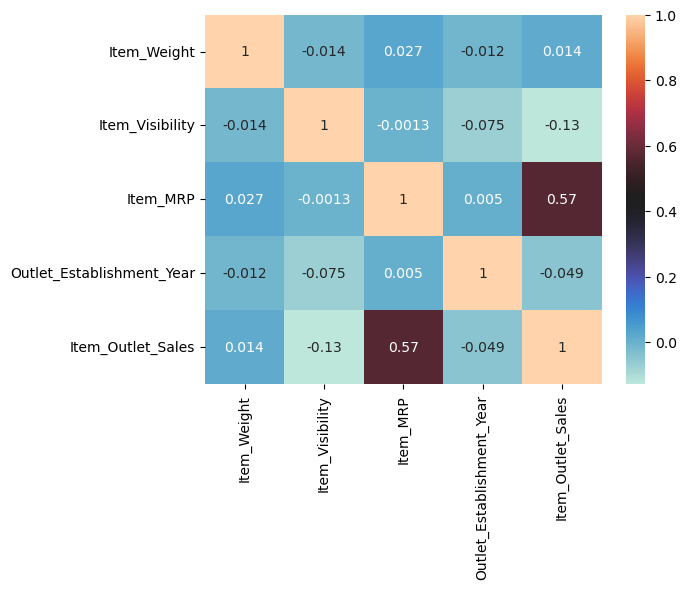

In [82]:
# Creating a correlation matrix
corr = df.corr()
# Plotting correlation matrix with seaborns heatmap
sns.heatmap(corr, annot=True, cmap='icefire')

Now that we've defined the correlation between the target and the features, I will list and explain the steps that I will take into greater detail below:

1. I will drop the columns:`'Item_Visibility'`, `'Outlet_Size'`, and `'Outlet_Establishment_Year'`.

In [83]:
# Dropping "Outlet_Size" and "Outlet_Establishment_Year"  
df.drop(columns=['Outlet_Size', 'Outlet_Establishment_Year', 'Item_Visibility', 'Item_Weight', 'Item_Identifier'], inplace=True)
# Checking NaN values
df.isna().sum()

Item_Fat_Content        0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

**Explaination:**
> 1. For `'Outlet_Size'` the `.isna().sum()` statement above, told us that `'Outlet_Size'` has `2410 na values`. This means that more than 5% of the data set in `'Outlet_Size'` is missing. This is far too many missing values to impute without corrupting our future model results.
>
> 2. For `'Outlet_Established_Year'`, `'Item_Weight'`, `'Item_Identifier'` and `'Item_Visibilty'` the correlations between the target variable `'Outlet_Item_Sales'`. Both columns having very low correlations with our target variable, '`Outlet_Established_Year'`: `-0.049`, `'Item_Visibilty'`: `-0.13`. That means that dropping these columns would not affect our bias or variance for future modeling.
>

- **Note:** *Also, dropping the columns with missing values `'Item_Visibility'` and `'Outlet_Size'`. This is a conviance, mainly due to `'Item_Weight'`. Column `Item_Weight'` could have also imputed with `.median()` value to fill the empty rows in the column. However, since its corralation is low compare to `'Outlet_Item_Sales'` dropping the data will not have an affect on the future modeling. I wanted to point out tthat imputing column `'Item_Visibility'` was an option.*

2. I will check for any inconsistency in the data set.

In [84]:
# Checking for unique values 
df.nunique()

Item_Fat_Content           5
Item_Type                 16
Item_MRP                5938
Outlet_Identifier         10
Outlet_Location_Type       3
Outlet_Type                4
Item_Outlet_Sales       3493
dtype: int64

Now I will create a for loop that iterate through each column and row that includes an `'object'` dtype.

In [85]:
# Using for loop to check values of columns for inconsistencies in categorical data.
df_c = df.copy()
df_dtype = df_c.select_dtypes(include='object')

for i in df_dtype.columns:
    print(df_dtype[i].value_counts())

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name:

Looking at the results column `'Item_Fat_Content'` has inconsistencies in the columns rows.

In [113]:
# Fixing the inconsistenties in Item_Fat_Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
# Checking to see if the inconsistenties are fixed
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [114]:
# Finding the min, max, and mean for every numeric column
df.agg({
    "Item_MRP": ['min', 'max', 'mean'],
    "Item_Outlet_Sales": ['min', 'max', 'mean']
}).round(2)

,Item_MRP,Item_Outlet_Sales
min,31.29,33.29
max,266.89,13086.96
mean,140.99,2181.29


### EDA (Exploratory Data Analysis)

### Histogram

Checking the database to see what columns in the list could be used to visualize certain features in this database.

In [88]:
df.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,Dairy,249.8092,OUT049,Tier 1,Supermarket Type1,3735.1380
1,Regular,Soft Drinks,48.2692,OUT018,Tier 3,Supermarket Type2,443.4228
2,Low Fat,Meat,141.6180,OUT049,Tier 1,Supermarket Type1,2097.2700
3,Regular,Fruits and Vegetables,182.0950,OUT010,Tier 3,Grocery Store,732.3800
4,Low Fat,Household,53.8614,OUT013,Tier 3,Supermarket Type1,994.7052


- After analysing the data set I've concluded that I want to find the differences between item outlet sales by type.

- Now I'm going to pick two outlets with different types to visualize the differences.
    - `OUT049` (Supermarket Type 1)
    - `OUT010` (Grocery Store)

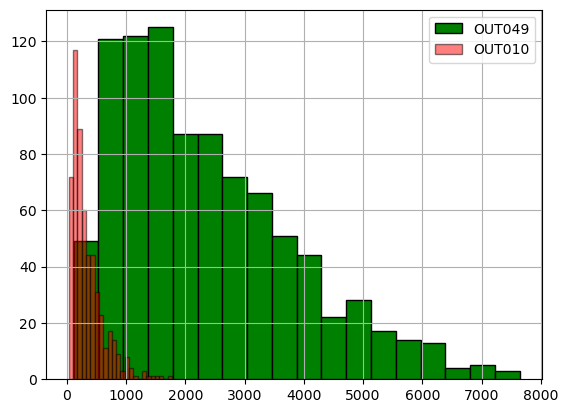

In [115]:
# Seeing the item sales from specified outlets.

# Using style to improve visualization.
plt.style.use('tableau-colorblind10')

# Creating filters so that it only visualize specified outlets.
df.loc[df['Outlet_Identifier'] == 'OUT049', 'Item_Outlet_Sales'].hist(bins='auto', edgecolor='black', facecolor='green', label='OUT049')
df.loc[df['Outlet_Identifier'] == 'OUT010', 'Item_Outlet_Sales'].hist(bins='auto', edgecolor='black', alpha=0.5, facecolor='red', label='OUT010')
# Using .legend() to identify outlets.
plt.legend();

- After taking a look at this graph it is apparent that `OUT049` item sales reaches higher margins than `OUT010` sales. 

### Boxplot

- Now I want to visualize the information regarding the mean, median, and mode of item sales of the specified outlets.

- We can accomplish this using `.boxplot()` to get this visualization.
    - First we will create filters assigning them to variables `outlet_49` and `outlet_10`.

In [90]:
# Creating filter to isolate OUT049 and OUT018 item sales. 
outlet_49 = df.loc[df['Outlet_Identifier']=='OUT049', 'Item_Outlet_Sales']
outlet_10 = df.loc[df['Outlet_Identifier']=='OUT010', 'Item_Outlet_Sales']

- Next will create the `.boxplot()` and customizing it to make the visuals more appealing and easy to comprehend.

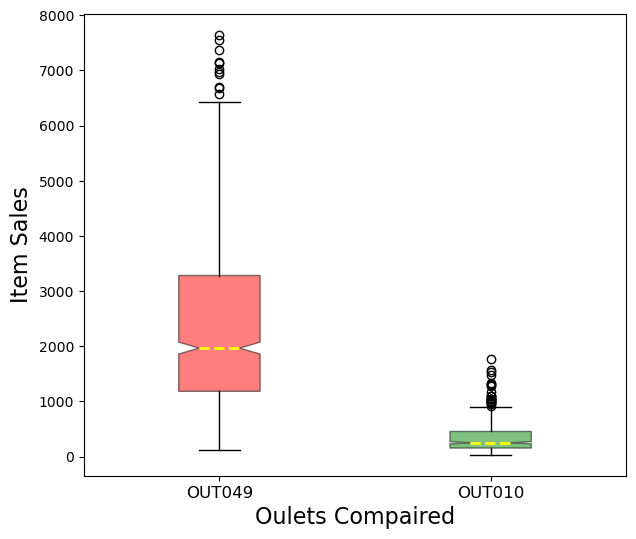

In [91]:
# Creating a boxplot to see to differences between two of the outlets of item_sales.

# Using same style as histogram.
with plt.style.context('tableau-colorblind10'):

# Using a combination of MATLAB-Style and Object Syntax to configure boxplot.
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 6))
    boxplots = axes.boxplot([outlet_49, outlet_10],
             notch=True,
             labels=['OUT049', 'OUT010'],
             widths=.3,
             patch_artist=True,
             medianprops=dict(linestyle='--', linewidth=2, color='Yellow'),
             boxprops=dict(linestyle='-', linewidth=1, color='Black', facecolor='Green', alpha=0.5))
    boxplot1 = boxplots['boxes'][0]
    boxplot1.set_facecolor('red')
    plt.xlabel('Oulets Compaired', fontsize=16)
    plt.ylabel('Item Sales', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=10)
plt.show()

- Looking at the visual above it is clear to see that `OUT049` has higher ranges and also salse but `OUT010` have more outliers as a result of the data given.

### Heat map

- Now I want to see the correlation coefficiency between the features in this dataset.
    - I will accomplish this by assigning `df.corr()` to the variable `corr` to get the correlations in the dataset.
    - Next I will use seaborns `.heatmap()` to graph the correlations found in `corr`.

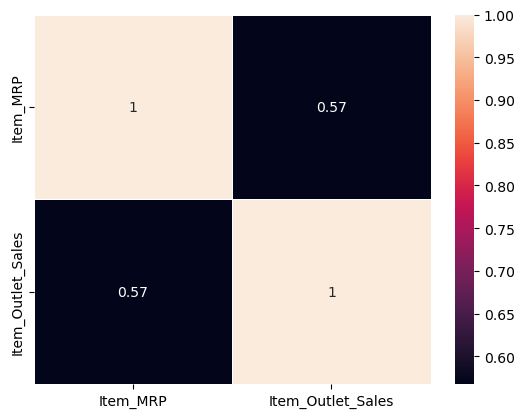

In [92]:
# Creating a heatmap.
corr = df.corr()

# I choose to keep the default style of seaborns heat map because I find that the style is already visually appealing.
# I did change the linecolor and linewidths to make the data in the heat map stand out.
ax = sns.heatmap(corr, annot=True, linecolor='White', linewidths=.7)

- After reviewing this heat map, the only two positive correltations present are, the columns positive correlation with themselves, and the positive correlation between `Item_MRP` and `Item_Outlet_Sales` (which is considered a `"moderate"` correlation being between 0.5 and 0.7). 

- To dive deeper into analizing this data we need to ask questions that stockholders may have about our analysis.

### Questions
1. What outlet has the most item sales?
2. What type of outlet has the most item sales?
3. Does location type have an affect on item sales?
4. Does item type affect the outlet item sales?
5. What outlet tier has the most item sales?

In [93]:
# First we will check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Fat_Content      8523 non-null   object 
 1   Item_Type             8523 non-null   object 
 2   Item_MRP              8523 non-null   float64
 3   Outlet_Identifier     8523 non-null   object 
 4   Outlet_Location_Type  8523 non-null   object 
 5   Outlet_Type           8523 non-null   object 
 6   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(2), object(5)
memory usage: 466.2+ KB


1. What outlet has the most item sales and what is the most common range for item sales?


In [94]:
# grouping outlets by item sales to see the highest earner
means = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False).round(2)
means

Outlet_Identifier
OUT027    3453926.05
OUT035    2268122.94
OUT049    2183969.81
OUT017    2167465.29
OUT013    2142663.58
OUT046    2118395.17
OUT045    2036725.48
OUT018    1851822.83
OUT010     188340.17
OUT019     179694.09
Name: Item_Outlet_Sales, dtype: float64

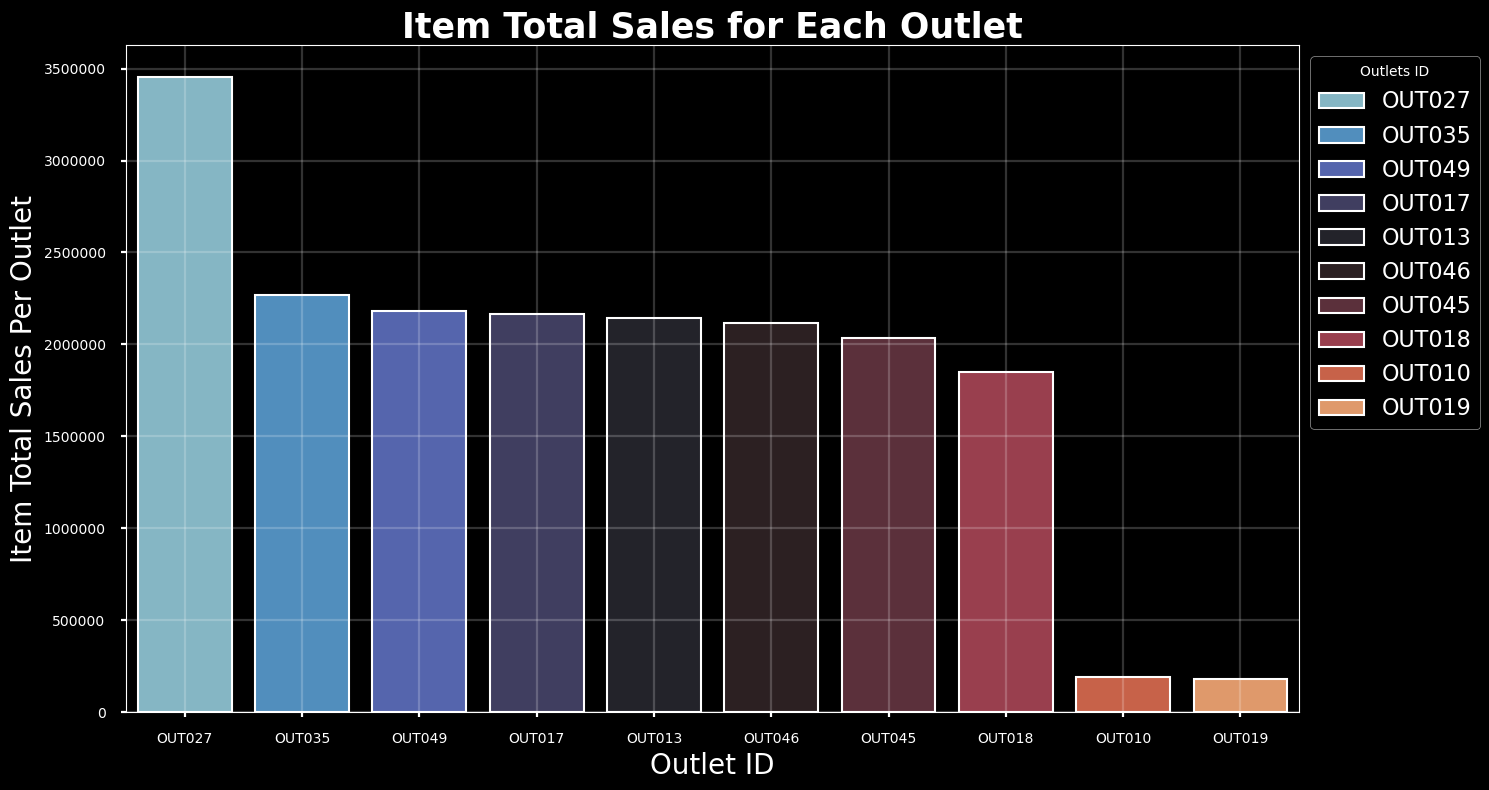

In [95]:
# setting style for barplot
with plt.style.context(['seaborn-muted', 'seaborn-poster', 'dark_background']):
  # setting fig size
  plt.figure(figsize=(15,8))
  # Creating barplot
  sns.barplot(x=means.index, 
              y=means.values, hue=means.index, 
              order=means.index, 
              dodge=False, 
              edgecolor='white', 
              linewidth=1.5, 
              ci=False, 
              palette='icefire')
  # Setting x & y ticks
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  # Setting x & y labels
  plt.ylabel('Item Total Sales Per Outlet', fontsize=20)
  plt.xlabel('Outlet ID', fontsize=20)
  plt.ticklabel_format(style='plain', axis='y')
  # Seting legend, grid, title, and tight_layout
  plt.legend(bbox_to_anchor=(1,1), title='Outlets ID')
  plt.title('Item Total Sales for Each Outlet', fontweight='bold', fontsize=25)
  plt.grid(color='w', alpha=0.2)
  plt.tight_layout()
plt.show()

- Looking at the barplot, the highest earning outlet is `OUT027`. Note, that most outlets are in between range 2,000 and 2,500. This means that most outlets have around the same item sales.

2. What type of outlet has the most item sales?

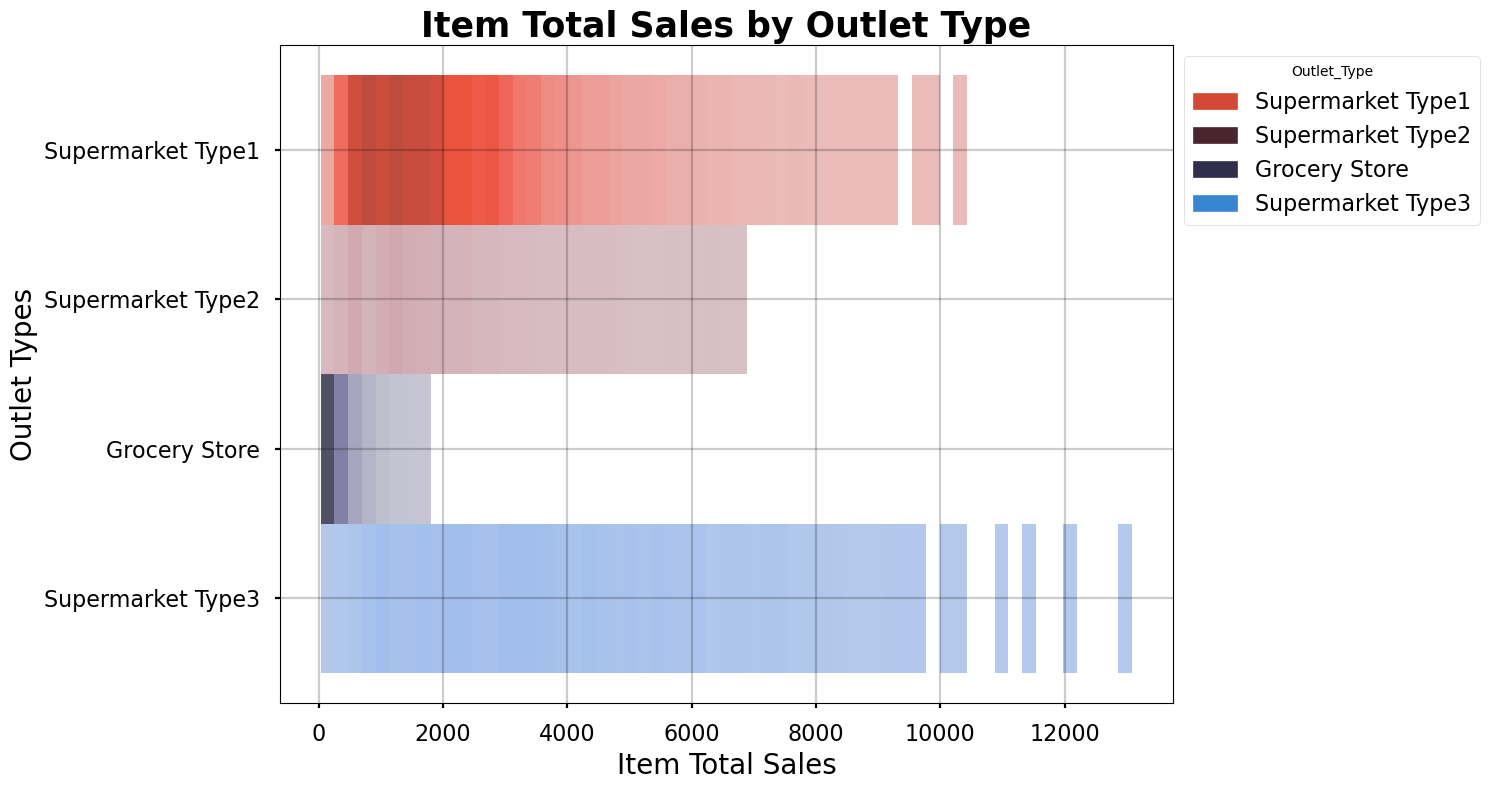

In [96]:
# Setting style for histplot
with plt.style.context(['seaborn-muted', 'seaborn-poster']):
  # Setting fig size
  plt.figure(figsize=(15, 8))
  # Creating histplot OOP style
  ax = sns.histplot(data=df, 
              x='Item_Outlet_Sales',
              y='Outlet_Type', 
              hue = 'Outlet_Type', 
              palette='icefire_r', 
              bins='auto',
              element='bars',
              multiple='dodge')

  sns.move_legend(ax, 'upper left',bbox_to_anchor=(1,1))
  # Setting x & y labels
  ax.set_xlabel('Item Total Sales', fontsize=20)
  ax.set_ylabel('Outlet Types', fontsize=20)
  # Setting title
  ax.set_title('Item Total Sales by Outlet Type', fontsize=25, fontweight='bold')
  # Setting grid & tight_layout
  plt.grid(color='black', alpha=0.2)
  plt.tight_layout()
plt.show()

3. Does location type have an affect on item sales?

In [121]:
df_sorted = df.sort_values(by='Outlet_Location_Type')
df_sorted.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,Dairy,249.8092,OUT049,Tier 1,Supermarket Type1,3735.1380
4073,Regular,Frozen Foods,155.2630,OUT049,Tier 1,Supermarket Type1,625.8520
4082,Regular,Baking Goods,97.2042,OUT046,Tier 1,Supermarket Type1,1686.4714
4085,Regular,Frozen Foods,161.9210,OUT049,Tier 1,Supermarket Type1,2120.5730
4087,Regular,Frozen Foods,228.4668,OUT049,Tier 1,Supermarket Type1,3916.2356


# *Will be continued*

In [127]:
#with plt.style.context(['seaborn-muted', 'dark_background']):
 #   sns.barplot(data=df, x=range(0,int(df['Item_Outlet_Sales'].sum()), y='Outlet_Location_Type' ,hue='Outlet_Location_Type')

## Project 1-Part 5

### Setting up dataframe before Machine Learning

- Splitting data to prepare for Machine Learning.

In [97]:
# Setting target (Item_Outlet_Sales) and features
X = df.drop(columns='Item_Outlet_Sales')
y = df['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [98]:
# Making selectors
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [99]:
# Making imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Making Scaler
scaler = StandardScaler()
# Making One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [100]:
# Making pipelines
num_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer, ohe)

In [101]:
# Making tuples for ColumnTransformer
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)
# Transforming
preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8afc3e24f0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8afc3e2fd0>)])

In [102]:
# Fitting preprocessor to X_train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8afc3e24f0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8afc3e2fd0>)])

In [103]:
# Transform train and test
train_process = preprocessor.transform(X_train)
test_process = preprocessor.transform(X_test)

In [104]:
# Checking to see if imputation of missing values worked.
print(np.isnan(train_process).sum().sum(), 'missing values in train.')
print('\n')
print(np.isnan(test_process).sum().sum(), 'missing values in test.')
print('\n')
train_process

0 missing values in train.


0 missing values in test.




array([[ 1.82810922,  1.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.60336888,  0.        ,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.24454056,  0.        ,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.52302674,  1.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.38377708,  1.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.73836105,  1.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

### Project 1 - Final

#### Importing Modules

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

- Creating function that evaulates the model.

In [106]:
def evaluate_func(data, X_train, y_train, X_test, y_test, train_pred, test_pred):
    # MAE
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    # MSE
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    #RMSE
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    # R2
    train_r2 = data.score(X_train, y_train)
    test_r2 = data.score(X_test, y_test)

    print(f'Train MAE: {train_mae}\nTest MAE: {test_mae}\n')
    print(f'Train MSE: {train_mae}\nTest MSE: {test_mse}\n')
    print(f'Train RMSE: {train_rmse}\nTest RMSE: {test_rmse}\n')
    print(f'Train R2: {train_r2}\nTest R2: {test_r2}')

#### Task 1
1. Your first task is to build a linear regression model to predict sales.

In [107]:
# Creating LinearRegression
lin_reg = LinearRegression()
# Making pipeline using scaler and lin_reg
reg_pipe = make_pipeline(preprocessor, lin_reg)
# fitting pipeline to training set
reg_pipe.fit(X_train,y_train)
# Creating predictions off of pipeline
train_pred = reg_pipe.predict(X_train)
test_pred = reg_pipe.predict(X_test)
# using custom function to see outputs of model using regression metrics
evaluate_func(data=reg_pipe, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, train_pred=train_pred, test_pred=test_pred)

Train MAE: 847.3390409012242
Test MAE: 803.345519044756

Train MSE: 847.3390409012242
Test MSE: 1193600.5935573883

Train RMSE: 1139.317988661739
Test RMSE: 1092.5202943457793

Train R2: 0.5613904687599012
Test R2: 0.5673757088061124


### Task 2
- Your second task is to build a regression tree model to predict sales.

#### Import Modules

In [108]:
from sklearn.tree import DecisionTreeRegressor

In [109]:
# Creating Decision tree pipeline with preprocessing
dec_tree_pipe = make_pipeline(preprocessor, DecisionTreeRegressor(random_state=42))
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8afc3e24f0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8afc3e2fd0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [110]:
# Crating list of depth values
depths = list(range(2,40))
# Creating dataframe to store the scores from loop
scores = pd.DataFrame(index=depths, columns=['Test Score', 'Train Score'])
# Creating for loop to loop through different depth to see the highest output
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
    dec_tree_pipe.fit(X_train, y_train)
    train_pred = dec_tree_pipe.predict(X_train)
    test_pred = dec_tree_pipe.predict(X_test)
    scores.loc[depth, 'Train Score'] = r2_score(y_train, train_pred)
    scores.loc[depth, 'Test Score'] = r2_score(y_test, test_pred)
# Sorting by test scores to see the highest value by depth
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
5,0.595768,0.603743
4,0.584005,0.582625
6,0.583692,0.614881
7,0.581142,0.625912
8,0.569833,0.639082


Text(0, 0.5, 'R2')

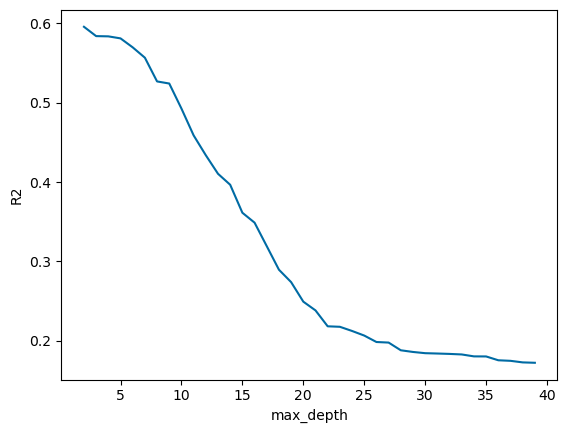

In [111]:
sns.lineplot(data=sorted_scores, x=depths, y='Test Score')
plt.xlabel('max_depth')
plt.ylabel('R2')

In [112]:
# Creating decision tree
dec_tree_4 = DecisionTreeRegressor(max_depth=5, random_state=42)

dec_4_pipe = make_pipeline(preprocessor, dec_tree_4)
# Fitting data to training sets
dec_4_pipe.fit(X_train, y_train)
# Creating predictions for training and testing sets
train_pred = dec_4_pipe.predict(X_train)
test_pred = dec_4_pipe.predict(X_test)
# Using custom function to see Regression Metric values
evaluate_func(data=dec_4_pipe, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, train_pred=train_pred, test_pred=test_pred)

Train MAE: 762.6003835955411
Test MAE: 737.8059166473585

Train MSE: 762.6003835955411
Test MSE: 1115266.7909904087

Train RMSE: 1082.9156109636097
Test RMSE: 1056.0619257365586

Train R2: 0.6037426008184527
Test R2: 0.5957680420497302


# Task 3
3. You now have tried 2 different models on your data set. You need to determine which model to implement.
    - Overall, which model do you recommend?
    - Justify your recommendation.

I would recommend the regression tree model. I came to this conclusion mainly from the `R2` and `RMSE` values and also the customization of the regression tree. Even though the `RMSE` is lower on the training and testing set for the regression tree. The `R2` for the regression is higher for both sets. Also, being able to customize the depth to have the highest output for the regression metric, it makes for a more accurate model prediction.